# 2D Motion Model

In this tuturial we will show the different 2D transformations:
1. Translation
2. Rotation
3. Scaled rotation
4. Affine
5. Projective

The transformation are on points (x,y) in 2D plane.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The transformations will be demonstrated on a grid of 20X20 (nx X ny) points.


In [2]:
h = 1
w = 1
nx = 20
ny = 20
x, y = np.meshgrid(np.linspace(-h,h,nx),np.linspace(-w,w,ny))

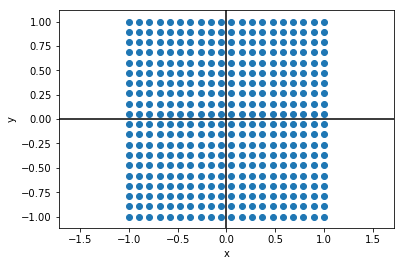

In [3]:
# plot the original points
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axis('equal')
plt.show()

### translation

The first transform is the TRANSLATION. It shifts each point by a scalar, t_1 in the horizontal axis and t_2 in the vertical axis. It can be represented as matrix multiplication on every point:

\begin{equation}
\begin{pmatrix}
x'\\y'
\end{pmatrix}
=
\begin{pmatrix}
1 \ 0 \ t_1\\
0 \ 1 \ t_2
\end{pmatrix}
\begin{pmatrix}
x\\y\\1
\end{pmatrix}
=
\begin{pmatrix}
x+t_1\\y+t_2
\end{pmatrix}
\end{equation}


In [4]:
# parameters to set:
t_1 = 0.75
t_2 = 1.25

t = np.array([[t_1,t_2]])
I = np.identity(2)
M = np.concatenate((I,t.T),axis=1)

x_trans = np.zeros(x.shape)
y_trans = np.zeros(y.shape)

for m in range(ny):
    for n in range(nx):
        x_i = np.array([x[m,n],y[m,n],1])
        X = np.dot(M,x_i.T)
        x_trans[m,n] = X[0]
        y_trans[m,n] = X[1]

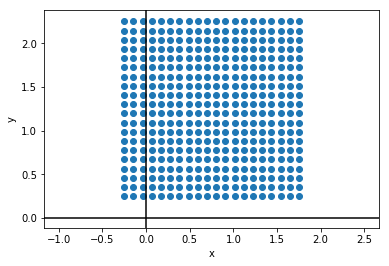

In [5]:
# plot the original points
plt.scatter(x_trans,y_trans)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axis('equal')
plt.show()

### Rotation and Translation

The second transform is the ROTATION transform (in addition to translation). It rotate the points around the point (0,0) and then shift it like the previous transform. The parameters are: ${t_1, t_2}$ - shifting in the x and y axis and $ {\theta} $ - the angle of rotation. 

\begin{equation}
\begin{pmatrix}
x'\\y'
\end{pmatrix}
=
 [R, t] x
=
\begin{pmatrix}
{\cos(\theta)} \  {-\sin(\theta)} \ t_1\\
{\cos(\theta)} \  {\sin(\theta)} \ t_2
\end{pmatrix}
\begin{pmatrix}
x\\y\\1
\end{pmatrix}
\end{equation}

Note that when ${\theta = 0}$ the transform is eqivalent to the previous one (translation).

In [6]:
# parameters to set:
t_1 = 0.5 # shifting in horizontal axis
t_2 = 1   # shifting in vertical axis
theta = np.pi / 3 # rotation (radians)

t = np.array([[t_1,t_2]])
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
M = np.concatenate((R,t.T),axis=1)

x_rot = np.zeros(x.shape)
y_rot = np.zeros(y.shape)

for m in range(ny):
    for n in range(nx):
        x_i = np.array([x[m,n],y[m,n],1])
        X = np.dot(M,x_i.T)
        x_rot[m,n] = X[0]
        y_rot[m,n] = X[1]

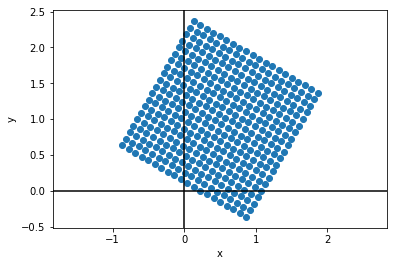

In [7]:
# plot the original points
plt.scatter(x_rot,y_rot)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axis('equal')
plt.show()

### Scaled Rotation

In this transform, in addition to rotation and translation, the points might be scaled (strteched or shrincked) by a scalar s. 


\begin{equation}
\begin{pmatrix}
x'\\y'
\end{pmatrix}
=
 [sR, t] x
=
\begin{pmatrix}
{s\cos(\theta)} \  {-s\sin(\theta)} \ t_1\\
{s\cos(\theta)} \  {s\sin(\theta)} \ t_2
\end{pmatrix}
\begin{pmatrix}
x\\y\\1
\end{pmatrix}
\end{equation}

Note that when ${s = 0}$ the transform is eqivalent to the previous one (rotation).

In [8]:
# parameters to set:
t_1 = 0.5 # shifting in horizontal axis
t_2 = 1   # shifting in vertical axis
theta = np.pi / 3 # rotation (radians)
s = 0.5   # scale

t = np.array([[t_1,t_2]])
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
M = np.concatenate((s*R,t.T),axis=1)

x_scaled = np.zeros(x.shape)
y_scaled = np.zeros(y.shape)

for m in range(ny):
    for n in range(nx):
        x_i = np.array([x[m,n],y[m,n],1])
        X = np.dot(M,x_i.T)
        x_scaled[m,n] = X[0]
        y_scaled[m,n] = X[1]

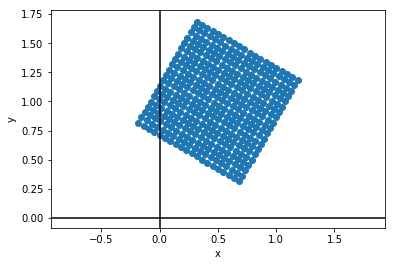

In [9]:
# plot the original points
plt.scatter(x_scaled,y_scaled)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axis('equal')
plt.show()

### Affine Transform

Until now all transforms preserved shapes, for example the square remains a square. The AFFINE transform can twists the shapes, it can transform a square to parallelogram. This transform preserves parallel lines.

\begin{equation}
\begin{pmatrix}
x'\\y'
\end{pmatrix}
=
\begin{pmatrix}
{a_{00}} \  {a_{01}} \ {a_{02}}\\
{a_{10}} \  {a_{11}} \ {a_{12}}
\end{pmatrix}
\begin{pmatrix}
x\\y\\1
\end{pmatrix}
\end{equation}

Note that when we set the scalars ${a_{ij}}$ as before - the transform is eqivalent to the previous one (scaled rotation).

In [10]:
# parameters to set:
a_00 = 0.7
a_01 = 0.1
a_02 = 0.5 # shifting in horizontal axis
a_10 = 0.1
a_11 = 0.3
a_12 = 0.5   # shifting in vertical axis

M = np.array([[a_00,a_01,a_02],[a_10,a_11,a_12]])

x_affine = np.zeros(x.shape)
y_affine = np.zeros(y.shape)

for m in range(ny):
    for n in range(nx):
        x_i = np.array([x[m,n],y[m,n],1])
        X = np.dot(M,x_i.T)
        x_affine[m,n] = X[0]
        y_affine[m,n] = X[1]

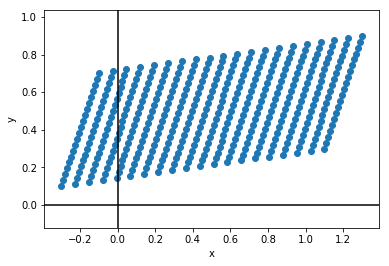

In [11]:
# plot the original points
plt.scatter(x_affine,y_affine)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axis('equal')
plt.show()

### Projective Transform

The PROJECTIVE transform (know also as PERSPECTIVE TRANSFORM and HOMOGRAPHY) preserve strate lines, but not parallel lines. It can transform a square to a tetragon.


\begin{equation}
\begin{pmatrix}
\tilde{x}'\\ \tilde{y}'\\ \tilde{z}'
\end{pmatrix}
\sim
\begin{pmatrix}
{a_{00}} \  {a_{01}} \ {a_{02}}\\
{a_{10}} \  {a_{11}} \ {a_{12}}\\
{a_{20}} \  {a_{21}} \ {a_{22}}
\end{pmatrix}
\begin{pmatrix}
x\\y\\1
\end{pmatrix}
\end{equation}

The $\sim$ denote equality up to scale, to find the points with the same scale we have to devide each vector
$\begin{pmatrix} \tilde{x}'\\ \tilde{y}'\\ \tilde{z}' \end{pmatrix}$ by $\tilde{z}'$ :

$\begin{pmatrix} x'\\ y' \end{pmatrix}$ = $\begin{pmatrix} \tilde{x}'/\tilde{z}'\\ \tilde{y}'/\tilde{z}' \end{pmatrix}$ 

In [12]:
# parameters to set:
a_00 = 0.7
a_01 = 0.1
a_02 = 0
a_10 = 0.1
a_11 = 0.3
a_12 = 0
a_20 = 0.1
a_21 = 0.3
a_22 = 1

M = np.array([[a_00,a_01,a_02],[a_10,a_11,a_12],[a_20,a_21,a_22]])

x_prj = np.zeros(x.shape)
y_prj = np.zeros(y.shape)

for m in range(ny):
    for n in range(nx):
        x_i = np.array([x[m,n],y[m,n],1])
        X = np.dot(M,x_i.T)
        x_prj[m,n] = X[0]/X[2]
        y_prj[m,n] = X[1]/X[2]

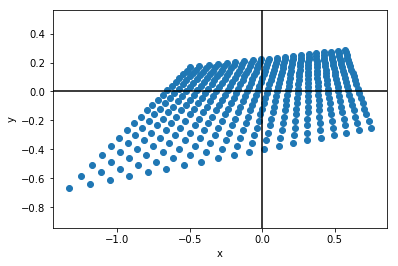

In [29]:
# plot the original points
plt.scatter(x_prj,y_prj)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axis('equal')
plt.show()